
# Blind source separation using FastICA

An example of estimating sources from noisy data.

`ICA` is used to estimate sources given noisy measurements.
Imagine 3 instruments playing simultaneously and 3 microphones
recording the mixed signals. ICA is used to recover the sources
ie. what is played by each instrument. Importantly, PCA fails
at recovering our `instruments` since the related signals reflect
non-Gaussian processes.


## Generate sample data



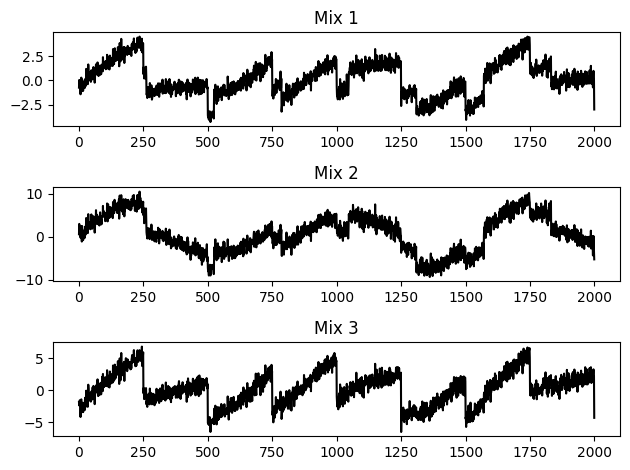

In [28]:
import numpy as np
from scipy import signal

np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
s3 = signal.sawtooth(2 * np.pi * time)  # Signal 3: saw tooth signal

S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise

S /= S.std(axis=0)  # Standardize data
# Mix data
A = np.array([[1, 1, 1], [3.5, 2, 1.0], [1.5, 0.45, 2.0]])  # Mixing matrix

X = np.dot(S, A.T)  # Generate observations

import matplotlib.pyplot as plt

# Assuming you have the signal X defined before this code
# Replace it with your actual data if necessary.

# Create a figure
plt.figure()

# Define the signal X and the subplot titles
signal_X = X
titles = ["Mix 1", "Mix 2", "Mix 3"]

# Iterate through the signal and subplot titles
for i in range(3):
    plt.subplot(3, 1, i + 1)  # 3 rows, 1 column, current subplot
    plt.title(titles[i])
    plt.plot(signal_X[:, i], color='black')  # Plot the i-th column of X

plt.tight_layout()
plt.show()


In [31]:
A



array([[1.  , 1.  , 1.  ],
       [3.5 , 2.  , 1.  ],
       [1.5 , 0.45, 2.  ]])

## Fit ICA and PCA models



In [29]:
from sklearn.decomposition import PCA, FastICA

# Compute ICA
ica = FastICA(n_components=3, whiten="arbitrary-variance")
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

# We can `prove` that the ICA model applies by reverting the unmixing.
assert np.allclose(X, np.dot(S_, A_.T) + ica.mean_)

# For comparison, compute PCA
pca = PCA(n_components=3)
H = pca.fit_transform(X)  # Reconstruct signals based on orthogonal components

## Plot results



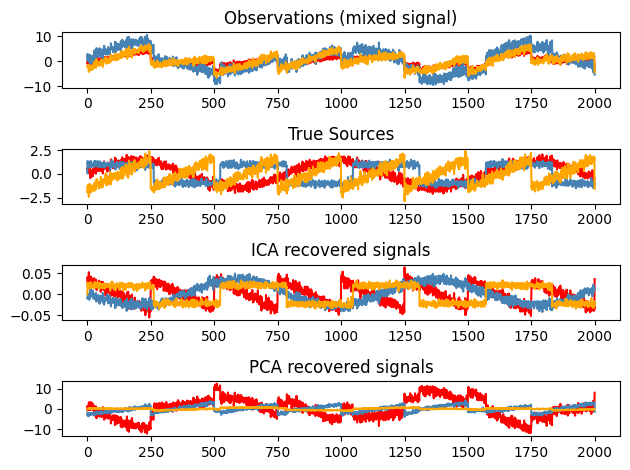

In [30]:
import matplotlib.pyplot as plt

plt.figure()

models = [X, S, S_, H]
names = [
    "Observations (mixed signal)",
    "True Sources",
    "ICA recovered signals",
    "PCA recovered signals",
]
colors = ["red", "steelblue", "orange"]

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.tight_layout()
plt.show()

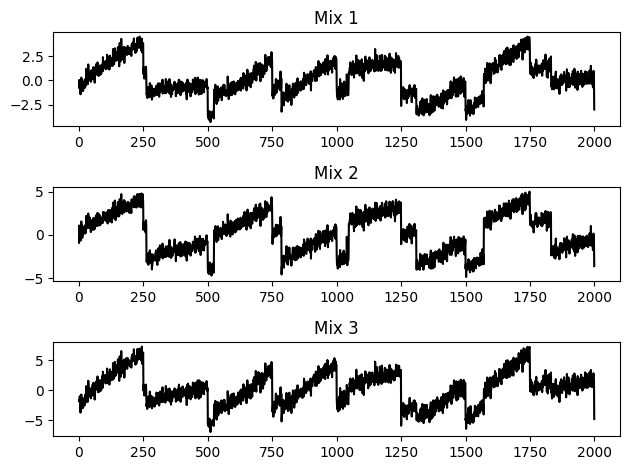

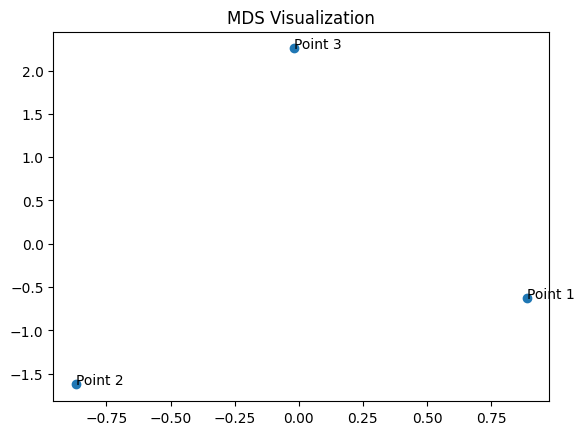

In [32]:
import numpy as np
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

# Create synthetic dissimilarity (distance) matrix
# In practice, you would replace this with your actual dissimilarity matrix.
dissimilarity_matrix = np.array([
    [0, 2, 3],
    [2, 0, 4],
    [3, 4, 0]
])

# Initialize MDS with 2D output space
mds = MDS(n_components=2, dissimilarity='precomputed')

# Fit the dissimilarity matrix and get the 2D representation
embedding = mds.fit_transform(dissimilarity_matrix)

# Plot the results
plt.scatter(embedding[:, 0], embedding[:, 1])
for i, (x, y) in enumerate(embedding):
    plt.text(x, y, f'Point {i + 1}')
plt.title("MDS Visualization")
plt.show()


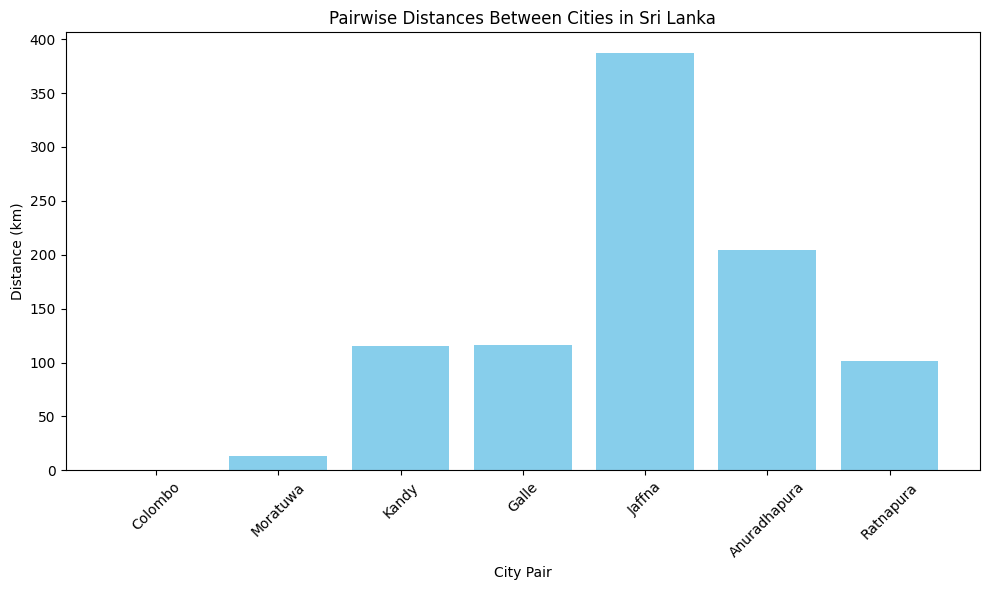

In [33]:
import matplotlib.pyplot as plt

# City data
cities = ["Colombo", "Moratuwa", "Kandy", "Galle", "Jaffna", "Anuradhapura", "Ratnapura"]

# Distance data
distances = [0, 13.4, 115.0, 116.0, 387.0, 204.0, 101.0]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(cities, distances, color='skyblue')
plt.title("Pairwise Distances Between Cities in Sri Lanka")
plt.xlabel("City Pair")
plt.ylabel("Distance (km)")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


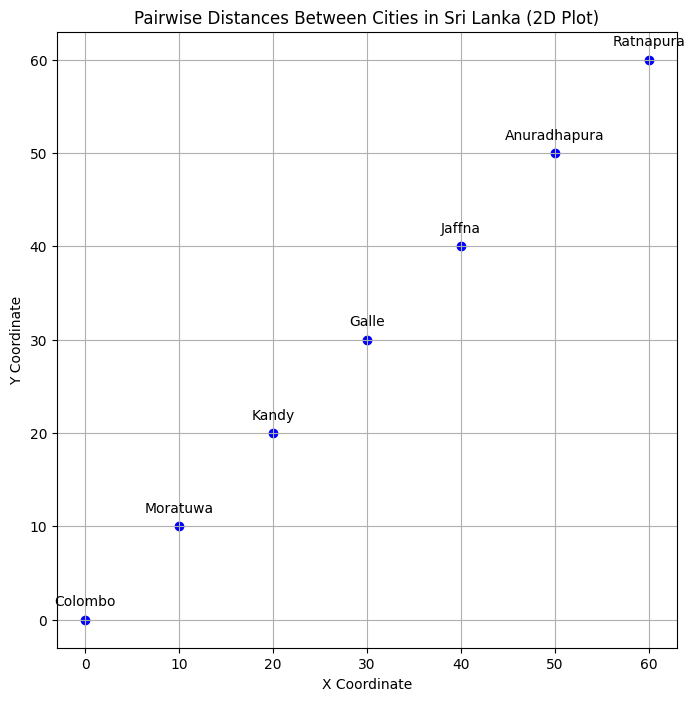

In [34]:
import matplotlib.pyplot as plt

# City data
cities = ["Colombo", "Moratuwa", "Kandy", "Galle", "Jaffna", "Anuradhapura", "Ratnapura"]

# Manually defined coordinates for a 2D scatterplot
x = [0, 10, 20, 30, 40, 50, 60]
y = [0, 10, 20, 30, 40, 50, 60]

# Create a 2D scatterplot
plt.figure(figsize=(8, 8))
plt.scatter(x, y, marker='o', color='blue')

# Annotate cities
for i, city in enumerate(cities):
    plt.annotate(city, (x[i], y[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.title("Pairwise Distances Between Cities in Sri Lanka (2D Plot)")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")

# Display the plot
plt.grid()
plt.show()


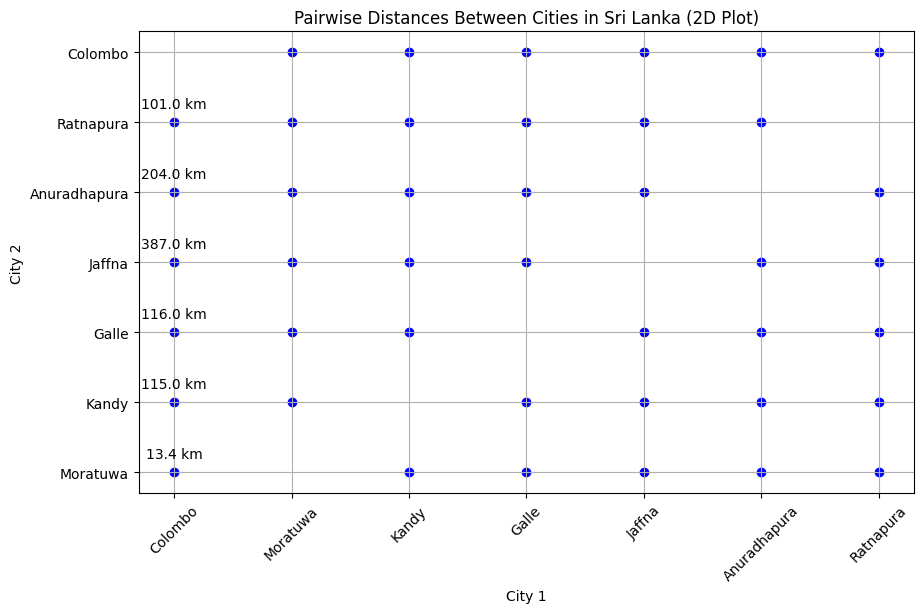

In [35]:
import matplotlib.pyplot as plt

# City data
cities = ["Colombo", "Moratuwa", "Kandy", "Galle", "Jaffna", "Anuradhapura", "Ratnapura"]

# Distance data
distances = {
    ("Colombo", "Moratuwa"): 13.4,
    ("Colombo", "Kandy"): 115.0,
    ("Colombo", "Galle"): 116.0,
    ("Colombo", "Jaffna"): 387.0,
    ("Colombo", "Anuradhapura"): 204.0,
    ("Colombo", "Ratnapura"): 101.0,
}

# Extract x, y coordinates
x = []
y = []
for city1 in cities:
    for city2 in cities:
        if city1 != city2:
            x.append(city1)
            y.append(city2)

# Create a scatterplot with lines representing distances
plt.figure(figsize=(10, 6))
plt.scatter(x, y, marker='o', color='blue')

# Annotate distances
for i, (city1, city2) in enumerate(distances.keys()):
    plt.annotate(f'{distances[(city1, city2)]} km', (x[i], y[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.title("Pairwise Distances Between Cities in Sri Lanka (2D Plot)")
plt.xlabel("City 1")
plt.ylabel("City 2")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.grid()
plt.show()


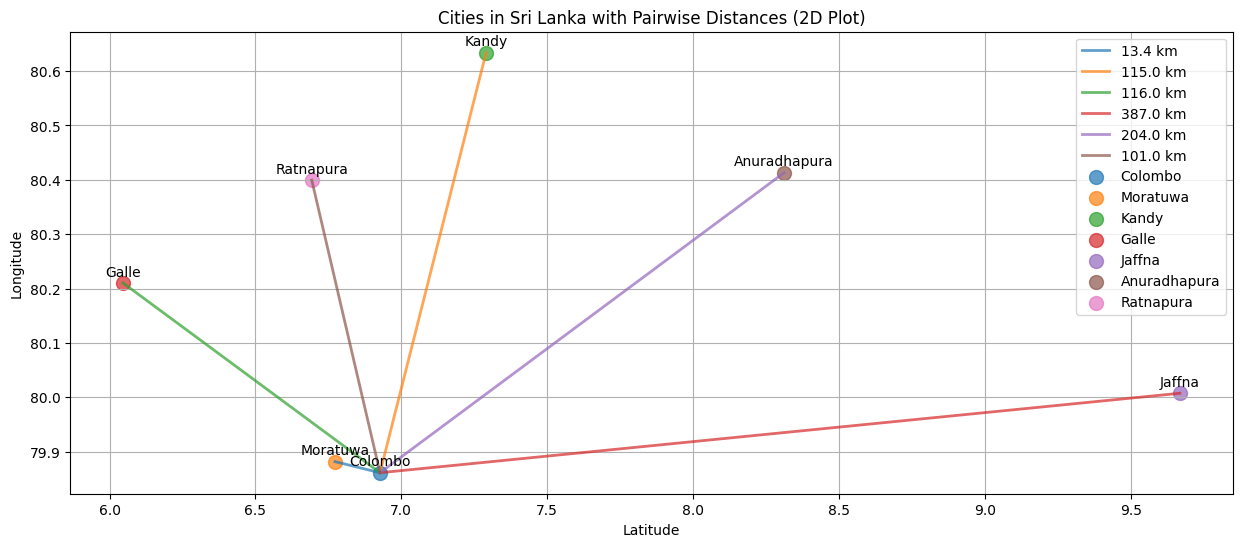

In [39]:
import matplotlib.pyplot as plt

# Coordinates of the cities
city_coordinates = {
    "Colombo": (6.927079, 79.861244),
    "Moratuwa": (6.773, 79.8816),
    "Kandy": (7.290572, 80.633726),
    "Galle": (6.0461, 80.2103),
    "Jaffna": (9.66845, 80.00742),
    "Anuradhapura": (8.31223, 80.41306),
    "Ratnapura": (6.6931, 80.3994)
}

# Distance data
distances = {
    ("Colombo", "Moratuwa"): 13.4,
    ("Colombo", "Kandy"): 115.0,
    ("Colombo", "Galle"): 116.0,
    ("Colombo", "Jaffna"): 387.0,
    ("Colombo", "Anuradhapura"): 204.0,
    ("Colombo", "Ratnapura"): 101.0,
}

# Create a scatterplot of cities
plt.figure(figsize=(15, 6))

# Plot city coordinates
for city, (lat, lon) in city_coordinates.items():
    plt.scatter(lat, lon, label=city, marker='o', s=100, alpha=0.7)

# Plot lines connecting cities based on distances
for (city1, city2), distance in distances.items():
    lat1, lon1 = city_coordinates[city1]
    lat2, lon2 = city_coordinates[city2]
    plt.plot([lat1, lat2], [lon1, lon2], linestyle='-', linewidth=2, alpha=0.7, label=f'{distance} km')

# Annotate city names
for city, (lat, lon) in city_coordinates.items():
    plt.annotate(city, (lat, lon), textcoords="offset points", xytext=(0, 5), ha='center')

plt.title("Cities in Sri Lanka with Pairwise Distances (2D Plot)")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.legend()

# Display the plot
plt.grid()
plt.show()


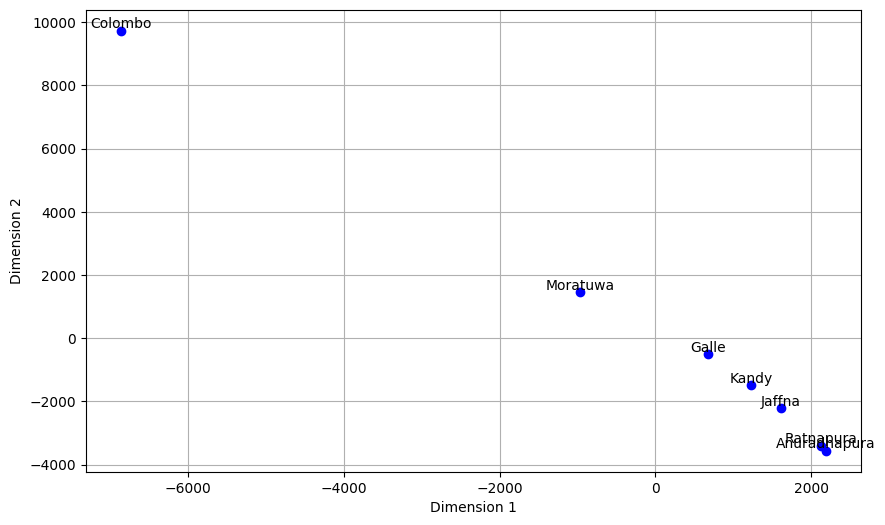

In [60]:
import numpy as np
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

# City data
cities = ["Colombo", "Moratuwa", "Kandy", "Galle", "Jaffna", "Anuradhapura", "Ratnapura"]

# Population density, latitude, and longitude data
population_density = [18407, 8250, 4591, 5712, 3766, 2314, 2474]
latitude = [6.927079, 6.773, 7.290572, 6.0461, 9.66845, 8.31223, 6.6931]
longitude = [79.861244, 79.8816, 80.633726, 80.2103, 80.00742, 80.41306, 80.3994]

# Create a dissimilarity matrix using Euclidean distance
distance_matrix = np.zeros((len(cities), len(cities)))

for i in range(len(cities)):
    for j in range(len(cities)):
        if i != j:
            d = np.sqrt((population_density[i] - population_density[j])**2 + 
                        (latitude[i] - latitude[j])**2 + 
                        (longitude[i] - longitude[j])**2)
            distance_matrix[i, j] = d

# Initialize MDS with 2D output space
mds = MDS(n_components=2, dissimilarity='precomputed')

# Fit the dissimilarity matrix and get the 2D representation
embedding = mds.fit_transform(distance_matrix)

# Create a scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(embedding[:, 0], embedding[:, 1], marker='o', color='blue')

# Annotate city names
for i, city in enumerate(cities):
    plt.annotate(city, (embedding[i, 0], embedding[i, 1]), textcoords="offset points", xytext=(0, 2), ha='center')


plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")

# Display the plot
plt.grid()
plt.show()


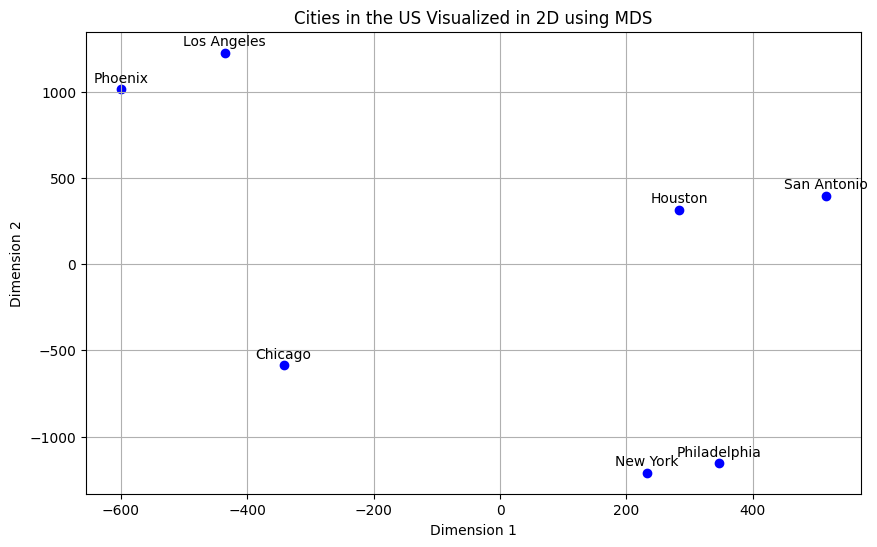

In [61]:
import numpy as np
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

# City data
cities = ["New York", "Los Angeles", "Chicago", "Houston", "Phoenix", "Philadelphia", "San Antonio"]

# Distance data (in miles)
distance_matrix = np.array([
    [0, 2446, 789, 1636, 2447, 95, 1583],
    [2446, 0, 1745, 1379, 373, 2397, 1243],
    [789, 1745, 0, 938, 1759, 997, 1407],
    [1636, 1379, 938, 0, 1009, 1574, 197],
    [2447, 373, 1759, 1009, 0, 2300, 1277],
    [95, 2397, 997, 1574, 2300, 0, 1533],
    [1583, 1243, 1407, 197, 1277, 1533, 0]
])

# Initialize MDS with 2D output space
mds = MDS(n_components=2, dissimilarity='precomputed')

# Fit the dissimilarity matrix and get the 2D representation
embedding = mds.fit_transform(distance_matrix)

# Create a scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(embedding[:, 0], embedding[:, 1], marker='o', color='blue')

# Annotate city names
for i, city in enumerate(cities):
    plt.annotate(city, (embedding[i, 0], embedding[i, 1]), textcoords="offset points", xytext=(0, 5), ha='center')

plt.title("Cities in the US Visualized in 2D using MDS")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")

# Display the plot
plt.grid()
plt.show()


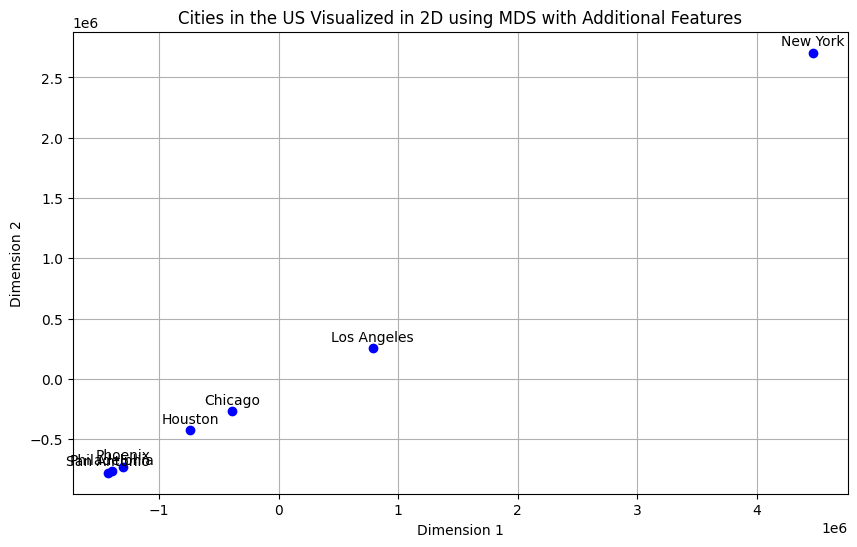

In [62]:
import numpy as np
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

# City data
cities = ["New York", "Los Angeles", "Chicago", "Houston", "Phoenix", "Philadelphia", "San Antonio"]

# Features: Population, Land Area (in square miles), Average Annual Temperature (in Fahrenheit)
features = np.array([
    [8398748, 468.9, 54],
    [3990456, 468.7, 66],
    [2705994, 227.3, 52],
    [2320268, 637.5, 68],
    [1680992, 517.6, 75],
    [1584064, 134.1, 56],
    [1547253, 461.0, 70]
])

# Calculate dissimilarity based on features (e.g., Euclidean distance)
# You can use other distance metrics based on your data and requirements.
distance_matrix = np.zeros((len(cities), len(cities)))

for i in range(len(cities)):
    for j in range(len(cities)):
        if i != j:
            d = np.sqrt(((features[i] - features[j]) ** 2).sum())
            distance_matrix[i, j] = d

# Initialize MDS with 2D output space
mds = MDS(n_components=2, dissimilarity='precomputed')

# Fit the dissimilarity matrix and get the 2D representation
embedding = mds.fit_transform(distance_matrix)

# Create a scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(embedding[:, 0], embedding[:, 1], marker='o', color='blue')

# Annotate city names
for i, city in enumerate(cities):
    plt.annotate(city, (embedding[i, 0], embedding[i, 1]), textcoords="offset points", xytext=(0, 5), ha='center')

plt.title("Cities in the US Visualized in 2D using MDS with Additional Features")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")

# Display the plot
plt.grid()
plt.show()


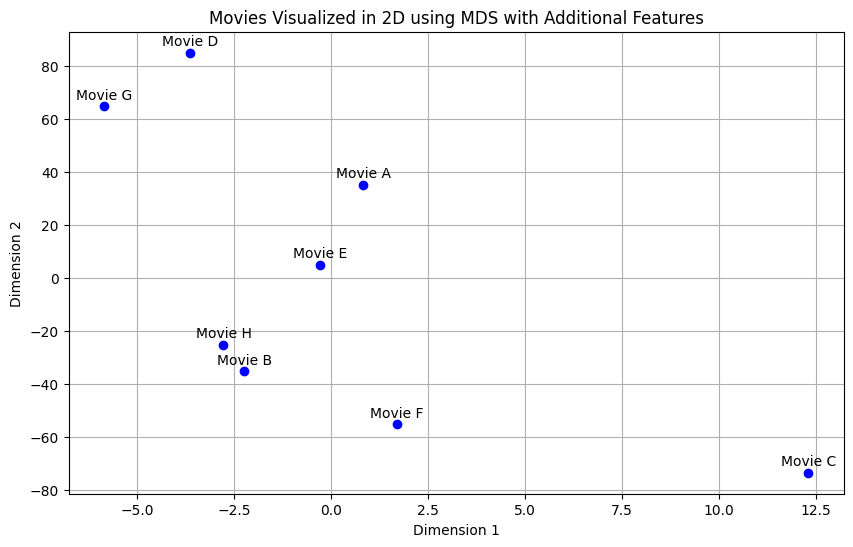

In [63]:
import numpy as np
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

# Movie data
movies = [
    "Movie A", "Movie B", "Movie C", "Movie D", "Movie E", "Movie F", "Movie G", "Movie H"
]

# Features: Genre (e.g., 0 for Action, 1 for Drama, 2 for Comedy), Budget (in millions), User Rating (0-10)
features = np.array([
    [0, 150, 7.8],
    [1, 80, 8.4],
    [2, 40, 6.2],
    [0, 200, 7.5],
    [1, 120, 8.0],
    [2, 60, 6.5],
    [0, 180, 7.2],
    [1, 90, 8.1]
])

# Calculate dissimilarity based on features (e.g., Euclidean distance)
# You can use other distance metrics based on your data and requirements.
distance_matrix = np.zeros((len(movies), len(movies)))

for i in range(len(movies)):
    for j in range(len(movies)):
        if i != j:
            d = np.sqrt(((features[i] - features[j]) ** 2).sum())
            distance_matrix[i, j] = d

# Initialize MDS with 2D output space
mds = MDS(n_components=2, dissimilarity='precomputed')

# Fit the dissimilarity matrix and get the 2D representation
embedding = mds.fit_transform(distance_matrix)

# Create a scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(embedding[:, 0], embedding[:, 1], marker='o', color='blue')

# Annotate movie names
for i, movie in enumerate(movies):
    plt.annotate(movie, (embedding[i, 0], embedding[i, 1]), textcoords="offset points", xytext=(0, 5), ha='center')

plt.title("Movies Visualized in 2D using MDS with Additional Features")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")

# Display the plot
plt.grid()
plt.show()


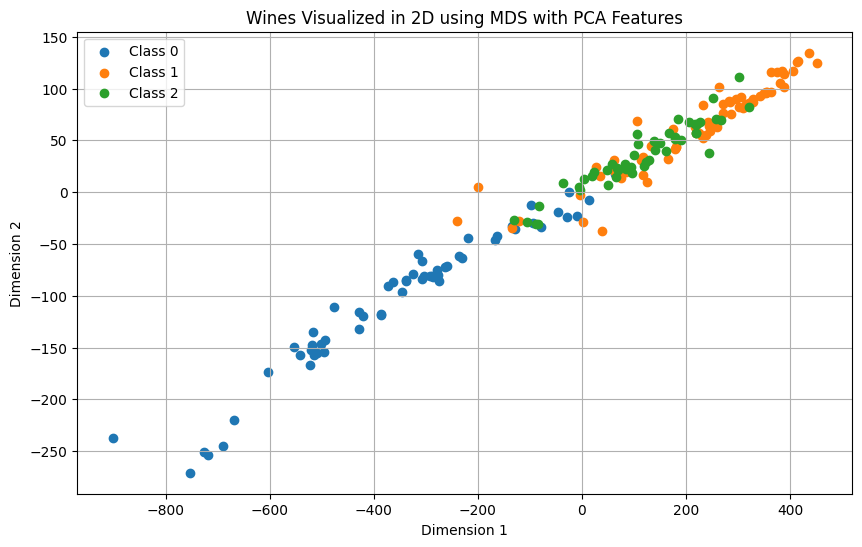

In [64]:
import numpy as np
from sklearn.manifold import MDS
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt

# Load the Wine dataset
wine_data = load_wine()
X = wine_data.data
y = wine_data.target

# Perform Principal Component Analysis (PCA) to reduce the dimensionality to 2
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Initialize MDS with 2D output space
mds = MDS(n_components=2, dissimilarity='euclidean')

# Fit the dissimilarity matrix and get the 2D representation
embedding = mds.fit_transform(X_pca)

# Create a scatterplot
plt.figure(figsize=(10, 6))
for label in np.unique(y):
    plt.scatter(embedding[y == label, 0], embedding[y == label, 1], label=f'Class {label}')

plt.title("Wines Visualized in 2D using MDS with PCA Features")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend()

# Display the plot
plt.grid()
plt.show()


In [69]:
import pandas as pd
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

# Load the MovieLens dataset
movies = pd.read_csv(r'C:\Users\Sampath\Downloads\ml-latest-small\ml-latest-small\movies.csv')  # Adjust the path to your dataset
ratings = pd.read_csv(r'C:\Users\Sampath\Downloads\ml-latest-small\ml-latest-small\ratings.csv')  # Adjust the path to your dataset

# Merge the movies and ratings data
movie_ratings = movies.merge(ratings, on='movieId')

# Calculate dissimilarity based on user ratings (you can use other features)
pivot_table = movie_ratings.pivot_table(index='userId', columns='title', values='rating', fill_value=0)
distance_matrix = 1 - pivot_table.corr()

# Initialize MDS with 2D output space
mds = MDS(n_components=2, dissimilarity='precomputed')

# Fit the dissimilarity matrix and get the 2D representation
embedding = mds.fit_transform(distance_matrix)

# Create a scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(embedding[:, 0], embedding[:, 1], marker='o', color='blue')

# Annotate movie titles
for i, title in enumerate(pivot_table.columns):
    plt.annotate(title, (embedding[i, 0], embedding[i, 1]), textcoords="offset points", xytext=(0, 5), ha='center')

plt.title("Movies Visualized in 2D using MDS with User Ratings")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")

# Display the plot
plt.grid()
plt.show()


In [4]:
import numpy as np
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Iris dataset
iris = sns.load_dataset("iris")

# Calculate pairwise dissimilarities using Euclidean distance
from scipy.spatial.distance import pdist, squareform
dissimilarity_matrix = squareform(pdist(iris.iloc[:, :4], metric='euclidean'))

# Initialize MDS with 2D output space
mds = MDS(n_components=2, dissimilarity='precomputed')

# Fit the dissimilarity matrix and get the 2D representation
embedding = mds.fit_transform(dissimilarity_matrix)

# Create a scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(embedding[:, 0], embedding[:, 1], c=iris['species'].astype('category').cat.codes, cmap='viridis')

# Annotate data points with species names
species_names = iris['species']

for i, species in enumerate(species_names):
    plt.annotate(species, (embedding[i, 0], embedding[i, 1]), textcoords="offset points", xytext=(0, 5), ha='center')

plt.title("Iris Dataset Visualized in 2D using MDS")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")

# Display the plot
plt.grid()
plt.show()


NameError: name 'type_check' is not defined